In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import os
import warnings

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: f'{x:.5f}')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.chdir(r'D:\libeibei\Desktop\dataset\creditcard_fraud_detection')
data = pd.read_csv('creditcard.csv')

In [41]:
print('shape:', data.shape)
print('columns:', data.columns)
print('info:\n', data.info())
print(data['Class'].value_counts(normalize=True))
print(data.isnull().sum().max())

shape: (284807, 31)
columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       

In [42]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,0.87625,0.84934,0.83818,0.81404,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,-14.12985,-25.16280,-9.49875,-7.21353,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,-0.46804,-0.48375,-0.49885,-0.45630,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,0.06641,-0.06568,-0.00364,0.00373,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,0.52330,0.39967,0.50081,0.45895,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,17.31511,9.25353,5.04107,5.59197,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


In [43]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


In [3]:
data['Hour'] = data['Time'].map(lambda x: int(np.ceil(float(x) / 3600) % 24))
data['scaled_Amount'] = StandardScaler().fit_transform(data[['Amount']])
data.drop(['Time', 'Amount'], axis=1, inplace=True)
data.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour,scaled_Amount
83668,-6.12200,-2.81890,-1.08183,0.60051,-3.06808,1.26670,1.06084,0.51979,0.77688,0.14093,0.87701,0.58319,0.01248,0.10406,1.05405,0.85222,0.10415,0.18835,1.10586,-1.83413,-0.42482,0.59014,-0.61998,-0.00393,-0.52275,1.44271,-1.09014,-0.88684,0,17,1.18859
38784,1.22442,-0.29611,-1.09734,-0.31045,1.93321,3.55724,-0.56452,0.85955,0.34084,-0.14593,-0.44994,0.25770,-0.16147,0.09569,-0.00989,0.05187,-0.46191,-0.25190,0.58106,0.06510,-0.26651,-0.81425,-0.05043,1.03487,0.59869,0.28122,-0.02670,0.01162,0,11,-0.19546
245754,-0.32697,0.32368,-0.06326,-0.16935,-0.64665,-0.77564,0.61980,0.26856,0.02913,-0.75604,-1.30427,-0.36539,-0.84016,0.54855,0.13437,0.11451,-0.12251,-0.06219,0.18818,0.02156,0.18212,0.21633,0.43382,0.04261,-0.86182,0.46462,-0.09056,0.03655,0,19,0.20646
208725,0.07956,0.69118,-0.14099,-0.92870,0.82802,-0.25342,0.78122,0.09077,-0.00537,-0.19472,-0.39704,-0.31208,-1.40454,0.54738,-0.86411,0.47090,-0.94373,0.26352,0.60058,-0.09764,-0.29500,-0.76967,-0.05711,-1.08494,-0.43550,0.18918,0.23315,0.07339,0,15,-0.34967
167171,0.07952,0.60583,-0.21206,-1.37542,1.54407,-0.22631,1.28322,-0.32322,-0.19939,-0.44859,0.28635,0.80118,0.82191,0.12449,-0.80999,0.29479,-1.54702,0.69535,-0.47642,-0.05967,0.40260,1.36379,-0.22631,0.14303,-0.64328,-0.44382,0.06372,0.02327,0,9,-0.28766


In [45]:
pd.pivot_table(data, index='Hour', columns='Class', values='scaled_Amount', aggfunc='count')
pd.crosstab(data['Hour'], data['Class'])

Class,0,1
Hour,,
0,10919,21
1,7687,6
2,4212,10
3,3269,57
4,3476,17
5,2185,23
6,2979,11
7,4093,9
8,7219,23


In [46]:
# Hour Histogram
def plot_histogram(df, norm):
    plt.figure(figsize=(15, 4))
    sns.distplot(data[data['Class'] == 0]['Hour'],
                bins=24,
                kde=False,
                norm_hist=norm,
                hist_kws={'alpha': .5},
                color='r',
                label='legit')
    sns.distplot(data[data['Class'] == 1]['Hour'],
                bins=24,
                norm_hist=norm,
                kde=False,
                hist_kws={'alpha': .5},
                color='b',
                label='fraud')
    plt.legend()
    plt.xticks(range(0, 24))
    plt.show()

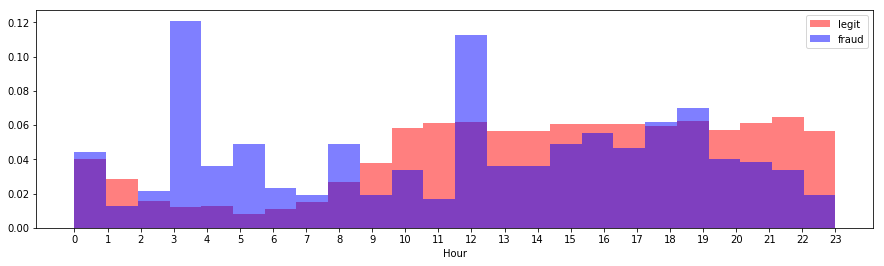

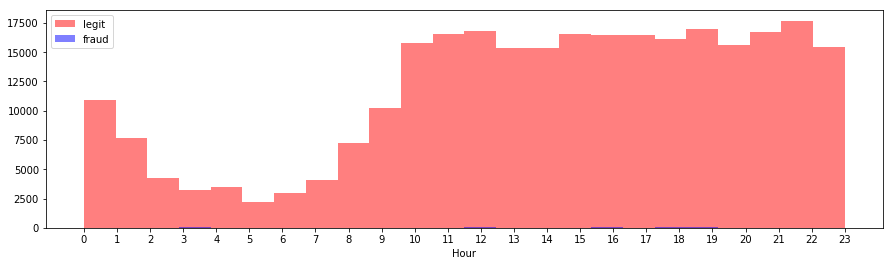

In [47]:
plot_histogram(data, True)  # 核密度估计度
plot_histogram(data, False)  # 直方图

In [48]:
# Hour-Amount violins
def plot_violins(minHour, maxHour):
    plt.figure(figsize=(15, 6))
    plt.title('Amount by Class throughout the day')
    plt.ylim([-1, 3.0])
    sns.violinplot(data=data[data['Hour'].isin(range(minHour, maxHour + 1))],
                       cut=0,
                       split=True,
                       x='Hour',
                       y='scaled_Amount',
                       palette='Set2',
                       hue='Class'
                  )
    plt.legend(loc='lower right')
    plt.show()

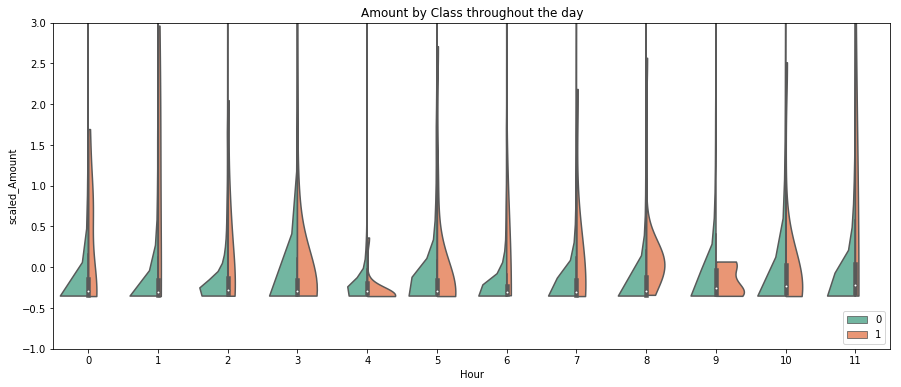

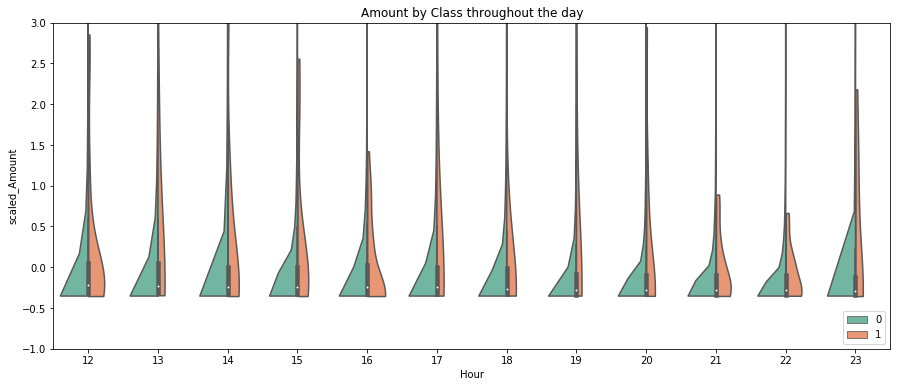

In [49]:
plot_violins(0, 11)
plot_violins(12, 23)

In [4]:
def ks_roc_pr(y_test, y_pred_prob):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    ks = max(tpr - fpr)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    return {'ks': round(ks, 3), 'roc_auc': round(roc_auc, 3), 'AP': round(average_precision, 3), 'pr_auc': round(pr_auc, 3)}

In [5]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=2)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)[:, 1]

eval_dict = ks_roc_pr(y_test, y_pred_prob)
print(eval_dict)

y_test_legit = data['Class'].value_counts()[0]
y_test_fraud = data['Class'].value_counts()[1]

{'ks': 0.904, 'roc_auc': 0.988, 'AP': 0.817, 'pr_auc': 0.816}


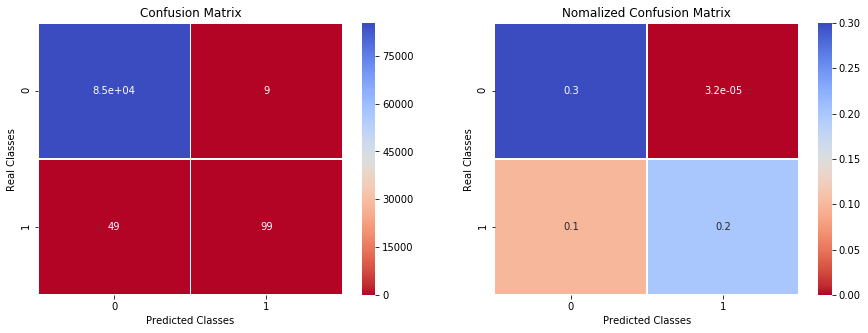

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.67      0.77       148

    accuracy                           1.00     85443
   macro avg       0.96      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [6]:
def plot_confusion_matrix(y_test, y_pred, y_test_legit, y_test_fraud):
    cfn_matrix = confusion_matrix(y_test, y_pred)
    cfn_norm_matrix = np.array([[1.0 / y_test_legit, 1.0 / y_test_legit], [1.0 / y_test_fraud, 1.0 / y_test_fraud]])
    norm_cfn_matrix = cfn_matrix * cfn_norm_matrix
    
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1, 2, 1)
    sns.heatmap(cfn_matrix, cmap='coolwarm_r', linewidths=.5, annot=True, ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Classes')
    plt.ylabel('Real Classes')
    
    ax = fig.add_subplot(1, 2, 2)
    sns.heatmap(norm_cfn_matrix, cmap='coolwarm_r', linewidths=.5, annot=True, ax=ax)
    plt.title('Nomalized Confusion Matrix')
    plt.xlabel('Predicted Classes')
    plt.ylabel('Real Classes')
    plt.show()
    
    print('Classification Report'.center(50, '*'))
    print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, y_test_legit, y_test_fraud)

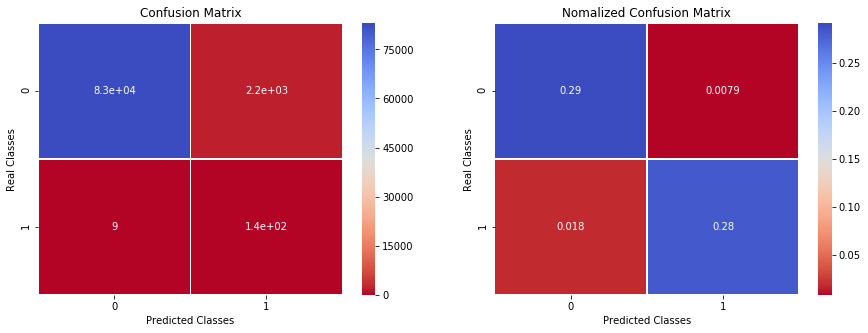

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.94      0.11       148

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.97      0.99     85443

{'ks': 0.921, 'roc_auc': 0.991, 'average_precision': 0.777, 'pr_auc': 0.797}


In [65]:
# Addressing class imbalance
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)[:, 1]
plot_confusion_matrix(y_test, y_pred, y_test_legit, y_test_fraud)

print(ks_roc_pr(y_test, y_pred_prob))

------------------------------------------class weight: 1-------------------------------------------


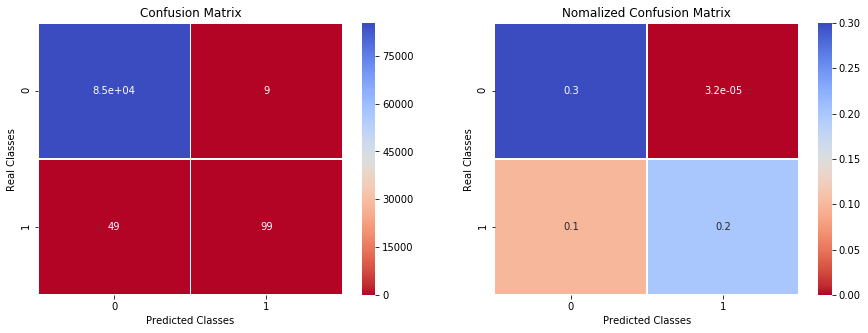

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.67      0.77       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.904, 'roc_auc': 0.988, 'average_precision': 0.817, 'pr_auc': 0.816}
------------------------------------------class weight: 2-------------------------------------------


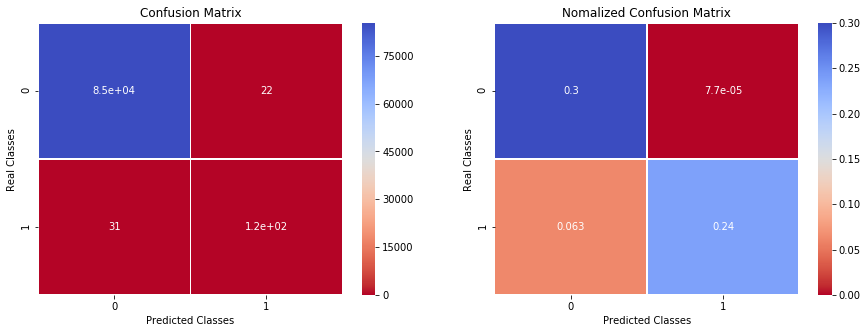

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.79      0.82       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.918, 'roc_auc': 0.99, 'average_precision': 0.823, 'pr_auc': 0.823}
------------------------------------------class weight: 3-------------------------------------------


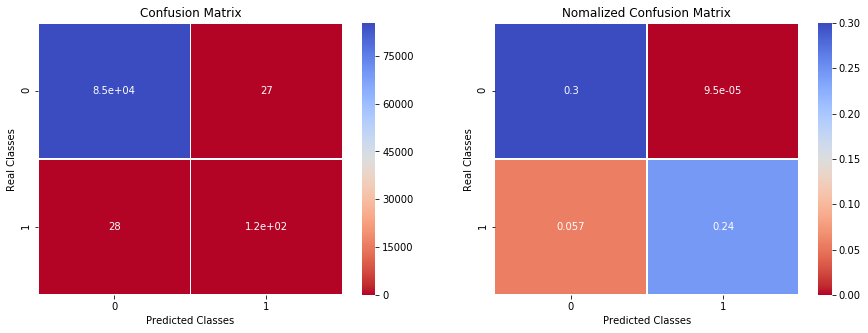

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.81      0.81       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.91      0.91     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.921, 'roc_auc': 0.991, 'average_precision': 0.824, 'pr_auc': 0.824}
------------------------------------------class weight: 4-------------------------------------------


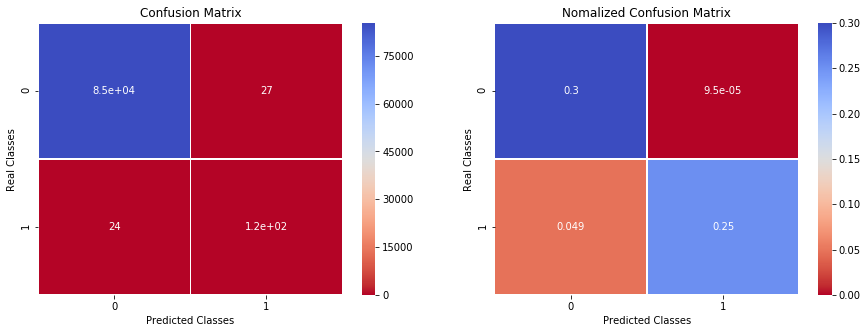

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.84      0.83       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.921, 'roc_auc': 0.991, 'average_precision': 0.824, 'pr_auc': 0.824}
------------------------------------------class weight: 5-------------------------------------------


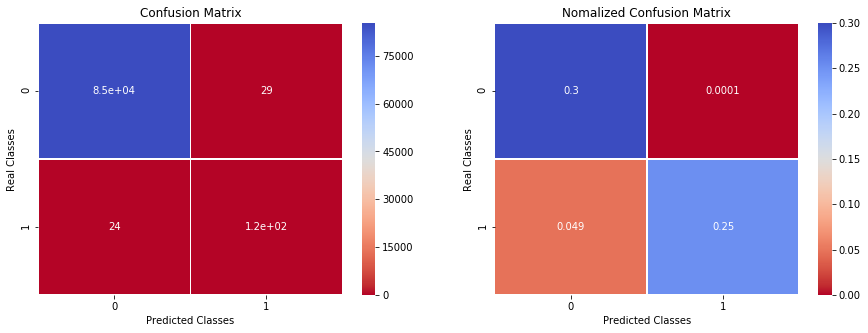

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.84      0.82       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.921, 'roc_auc': 0.991, 'average_precision': 0.824, 'pr_auc': 0.824}
------------------------------------------class weight: 10------------------------------------------


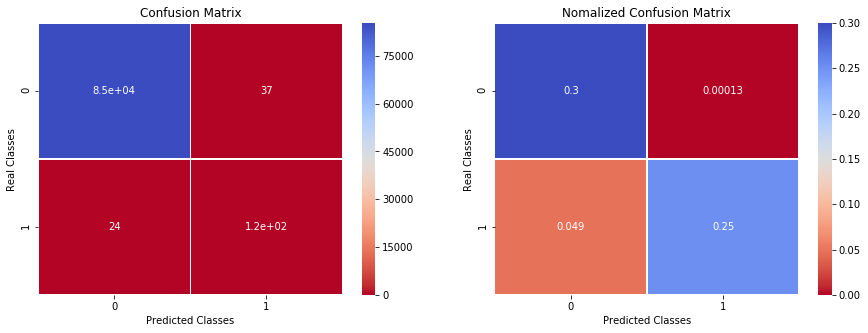

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.84      0.80       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.88      0.92      0.90     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.919, 'roc_auc': 0.991, 'average_precision': 0.824, 'pr_auc': 0.823}
------------------------------------------class weight: 20------------------------------------------


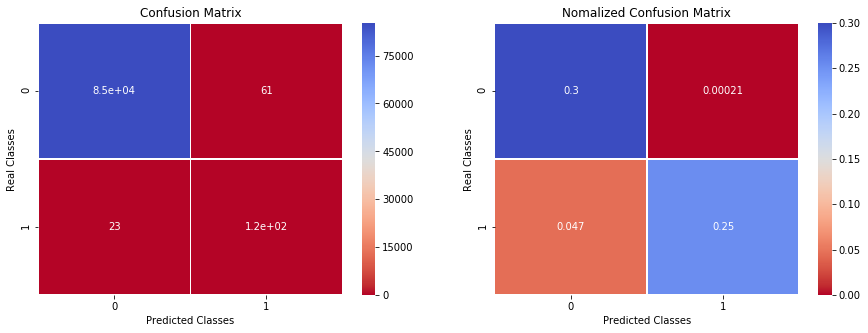

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.67      0.84      0.75       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.84      0.92      0.87     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.919, 'roc_auc': 0.991, 'average_precision': 0.824, 'pr_auc': 0.823}
------------------------------------------class weight: 50------------------------------------------


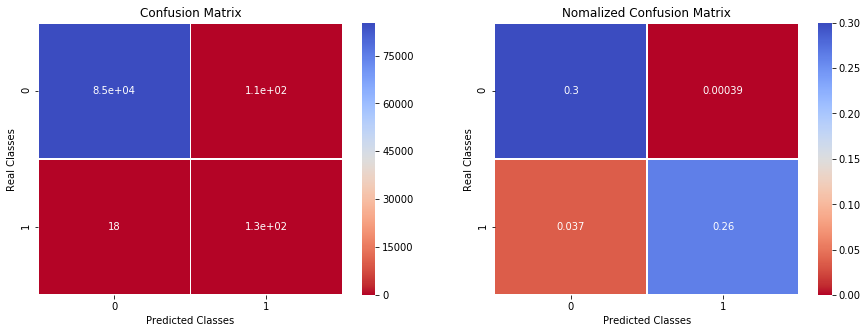

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.54      0.88      0.67       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.77      0.94      0.83     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.923, 'roc_auc': 0.991, 'average_precision': 0.822, 'pr_auc': 0.822}
-----------------------------------------class weight: 100------------------------------------------


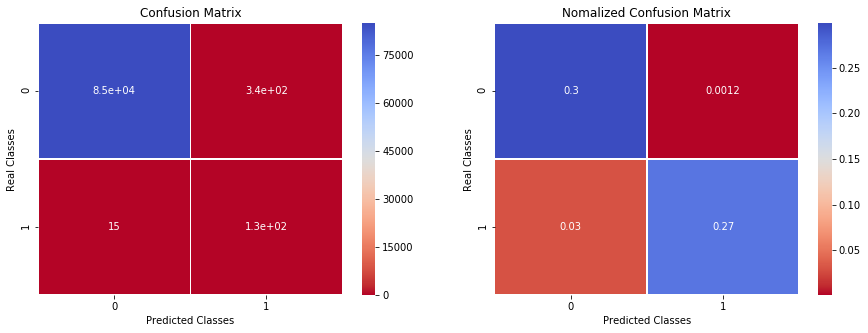

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.28      0.90      0.43       148

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.64      0.95      0.71     85443
weighted avg       1.00      1.00      1.00     85443

{'ks': 0.924, 'roc_auc': 0.991, 'average_precision': 0.819, 'pr_auc': 0.819}
-----------------------------------------class weight: 1000-----------------------------------------


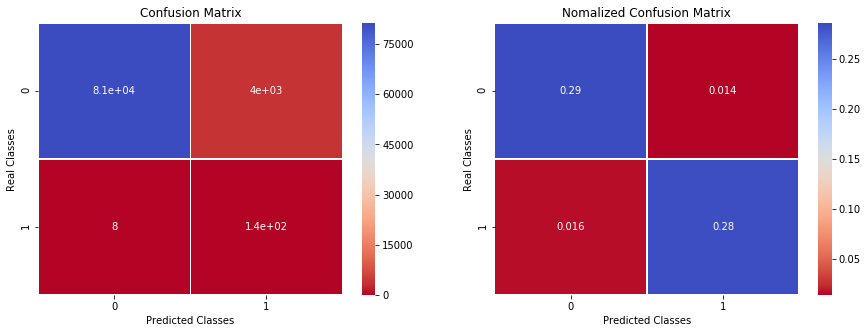

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.95      0.07       148

   micro avg       0.95      0.95      0.95     85443
   macro avg       0.52      0.95      0.52     85443
weighted avg       1.00      0.95      0.97     85443

{'ks': 0.916, 'roc_auc': 0.99, 'average_precision': 0.778, 'pr_auc': 0.801}
----------------------------------------class weight: 10000-----------------------------------------


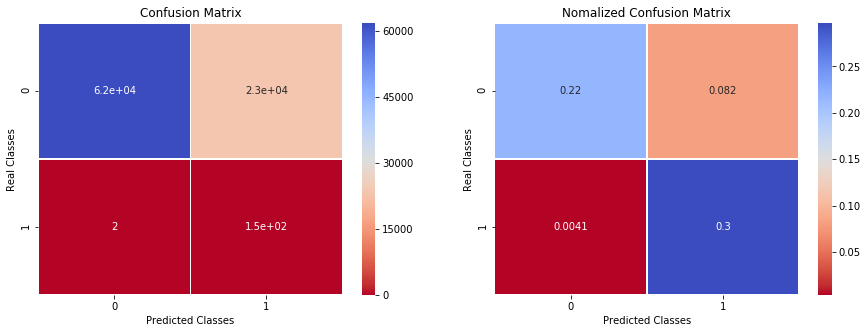

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      0.73      0.84     85295
           1       0.01      0.99      0.01       148

   micro avg       0.73      0.73      0.73     85443
   macro avg       0.50      0.86      0.43     85443
weighted avg       1.00      0.73      0.84     85443

{'ks': 0.906, 'roc_auc': 0.986, 'average_precision': 0.678, 'pr_auc': 0.763}


In [70]:
for w in [1, 2, 3, 4, 5, 10, 20, 50, 100, 1000, 10000]:
    LR = LogisticRegression(class_weight={0:1, 1:w})
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    y_pred_prob = LR.predict_proba(X_test)[:, 1]
    print(f'class weight: {w}'.center(100, '-'))
    plot_confusion_matrix(y_test, y_pred, y_test_legit, y_test_fraud)
    print(ks_roc_pr(y_test, y_pred_prob))

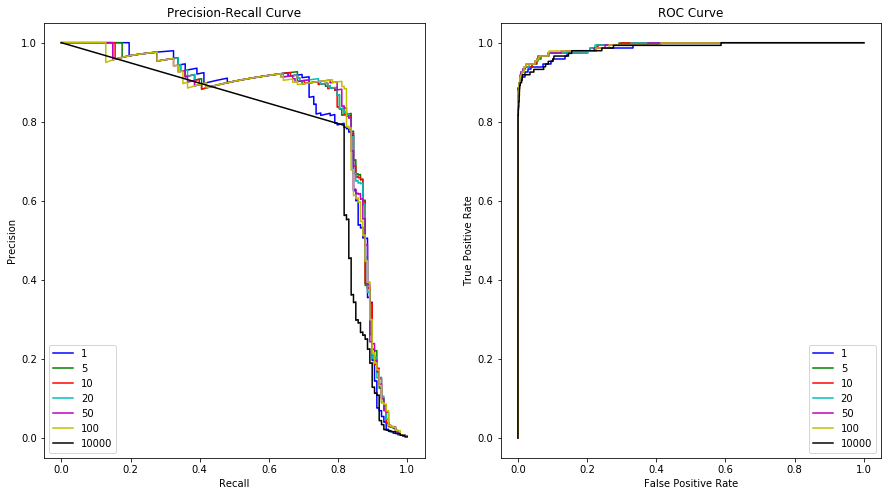

In [74]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim([-0.05, 1.05])
ax1.set_ylim([-0.05, 1.05])
ax1.set_title('Precision-Recall Curve')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-0.05, 1.05])
ax2.set_ylim([-0.05, 1.05])
ax2.set_title('ROC Curve')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')

for w, c in zip([1, 5, 10, 20, 50, 100, 10000], 'bgrcmyk'):
    LR = LogisticRegression(class_weight={0:1, 1:w})
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_test)
    y_pred_prob = LR.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    ax1.plot(recall, precision, c=c, label=w)
    ax2.plot(fpr, tpr, c=c, label=w)
ax1.legend()
ax2.legend()
plt.show()

In [7]:
# Tune parameters
param_grid = {
    # 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    # 'penalty': ['l1', 'l2'],
    # 'max_iter': [100, 200, 500, 1000],
    'class_weight': ['balanced', {0:1, 1:1}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:20}]
}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)
# scoring: accuracy/balanced_accuracy/neg_log_loss/f1
grid_search = GridSearchCV(LogisticRegression(n_jobs=-1, C=1, penalty='l1'), param_grid=param_grid, cv=kfold, scoring='f1')
grid_search.fit(X_train, y_train)
gs = grid_search.best_estimator_
gs.fit(X_train, y_train)
print('params:', grid_search.best_params_)
print('best score:', grid_search.best_score_)

y_pred = gs.predict(X_test)
y_pred_prob = gs.predict_proba(X_test)[:, 1]
print(ks_roc_pr(y_test, y_pred_prob))

params: {'class_weight': {0: 1, 1: 5}}
best score: 0.7833551417685071
{'ks': 0.92, 'roc_auc': 0.991, 'AP': 0.825, 'pr_auc': 0.824}


{'ks': 0.92, 'roc_auc': 0.991, 'AP': 0.825, 'pr_auc': 0.824}


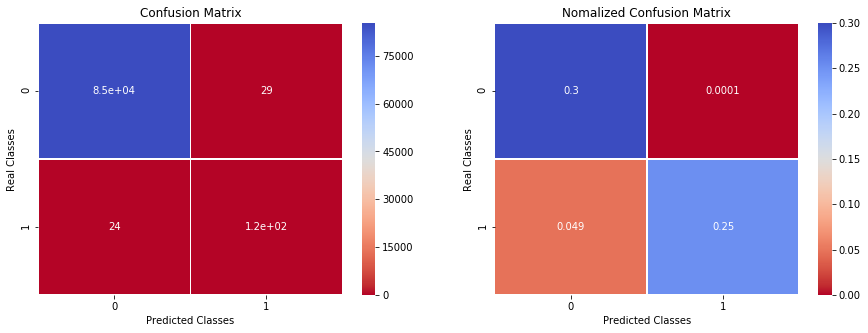

**************Classification Report***************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.81      0.84      0.82       148

    accuracy                           1.00     85443
   macro avg       0.91      0.92      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [8]:
LR = LogisticRegression(C=1, penalty='l1', class_weight={0:1, 1:5})
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)[:, 1]
print(ks_roc_pr(y_test, y_pred_prob))
plot_confusion_matrix(y_test, y_pred, y_test_legit, y_test_fraud)
